# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn import datasets, svm
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from scipy.stats import randint
import time
import pickle
from sklearn.externals import joblib
from pprint import pprint
import random

# Loading and Pre-processing the data

In [2]:
digits = datasets.load_digits()
imgs = digits.images
labels = digits.target

In [3]:
print('Images Shape : ', imgs.shape)
print('Labels Shape : ', labels.shape)

Images Shape :  (1797, 8, 8)
Labels Shape :  (1797,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.2, random_state=42)

In [5]:
#print('Train Dataset', x_train.shape)
#print('Test Dataset', x_test.shape)

#print('Training Set Labels', y_train.shape)
#print('Testing Set Labels', y_test.shape)

In [6]:
print('Train Dataset', x_train.shape)
print('Test Dataset', x_test.shape)

print('Training Set Labels', y_train.shape)
print('Testing Set Labels', y_test.shape)

Train Dataset (1437, 8, 8)
Test Dataset (360, 8, 8)
Training Set Labels (1437,)
Testing Set Labels (360,)


In [7]:
#train_samples, tr_x, tr_y = x_train.shape
#train_dataset = x_train.reshape((train_samples, tr_x*tr_y))

#test_samples, ts_x, ts_y = x_test.shape
#test_dataset = x_test.reshape((test_samples, ts_x*ts_y))

In [8]:
train_samples, tr_x, tr_y = x_train.shape
train_dataset = x_train.reshape((train_samples, tr_x*tr_y))

test_samples, ts_x, ts_y = x_test.shape
test_dataset = x_test.reshape((test_samples, ts_x*ts_y))

In [9]:
print('Train Dataset', train_dataset.shape)
print('Test Dataset', test_dataset.shape)

print('Training Set Labels', y_train.shape)
print('Testing Set Labels', y_test.shape)

Train Dataset (1437, 64)
Test Dataset (360, 64)
Training Set Labels (1437,)
Testing Set Labels (360,)


In [10]:
no_cv = 10
no_iter = 10
no_verbose = 1
no_process = -1

# Training, Testing & Saving the Models

## Decision Tree Classifier

In [11]:
clf_DT = DecisionTreeClassifier()
param_dist = {"criterion":["gini", "entropy"], "splitter":["best", "random"], "max_depth":[None], "min_samples_split":[2,3,4,5,6,7,8,9,10,11,12,13,14,15], "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10,11]}
classifier_Decision_Tree = RandomizedSearchCV(estimator = clf_DT, param_distributions = param_dist, n_iter=no_iter, cv=no_cv, verbose=no_verbose, random_state=5, n_jobs=no_process)

start_training_Decision_Tree = time.time()
classifier_Decision_Tree.fit(train_dataset, y_train)
end_training_Decision_Tree = time.time()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


In [12]:
classifier_Decision_Tree.grid_scores_

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83159, std: 0.02455, params: {'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_depth': None, 'criterion': 'entropy'},
 mean: 0.82185, std: 0.02807, params: {'splitter': 'best', 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'},
 mean: 0.84899, std: 0.01933, params: {'splitter': 'best', 'min_samples_split': 11, 'min_samples_leaf': 6, 'max_depth': None, 'criterion': 'entropy'},
 mean: 0.78706, std: 0.02500, params: {'splitter': 'random', 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_depth': None, 'criterion': 'entropy'},
 mean: 0.85943, std: 0.02761, params: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'},
 mean: 0.84412, std: 0.03010, params: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'},
 mean: 0.83786, std: 0.03311, params: {'splitter': 'random', 'min_samples_split': 8, 'min_samples_lea

In [13]:
best_score_DT = classifier_Decision_Tree.best_score_
best_index_DT = classifier_Decision_Tree.best_index_
best_parameters_DT = classifier_Decision_Tree.best_params_
best_estimator_DT = classifier_Decision_Tree.best_estimator_
time_for_all_validations_DT = classifier_Decision_Tree.cv_results_['mean_fit_time']
time_best_index_DT = time_for_all_validations_DT[best_index_DT]

print('Best Accuracy : ', best_score_DT)
print('Best Index : ', best_index_DT)
print('Best Parameters : ', best_parameters_DT)
print('Best Estimator : ', best_estimator_DT)
print('Mean Time of each validation : ', time_for_all_validations_DT)
print('Time for all cross-validations of best index : ', time_best_index_DT*no_cv, 'seconds')

training_time_Decision_Tree = end_training_Decision_Tree - start_training_Decision_Tree
print('Total Training Time Decision Tree Classifier : ', training_time_Decision_Tree, 'seconds')

Best Accuracy :  0.8594293667362561
Best Index :  4
Best Parameters :  {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best Estimator :  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Mean Time of each validation :  [0.01964767 0.02184143 0.0303184  0.00668232 0.02642915 0.02174108
 0.00718071 0.02373595 0.01655557 0.00438786]
Time for all cross-validations of best index :  0.26429152488708496 seconds
Total Training Time Decision Tree Classifier :  2.6299681663513184 seconds


In [14]:
start_testing_Decision_Tree = time.time()
predict_Decision_Tree = classifier_Decision_Tree.predict(test_dataset)
end_testing_Decision_Tree = time.time()

print('Predicted Labels : ', predict_Decision_Tree)
print('Actual Labels : ', y_test)
print('Predicted Labels Shape : ', predict_Decision_Tree.shape)
print('Actual Labels Shape : ', y_test.shape)

test_score_Decision_Tree = classifier_Decision_Tree.score(test_dataset, y_test)
print('Test Accuracy : ', test_score_Decision_Tree)

testing_time_Decision_Tree = end_testing_Decision_Tree - start_testing_Decision_Tree
print('Testing Time : ', testing_time_Decision_Tree)

Predicted Labels :  [6 9 3 7 2 1 5 3 5 7 1 9 0 0 4 8 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 1 5 6 0 9 0 0 1 7 4 5 5 4 5 7 0 7 5 9 5 5 0
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 1 5 7 4 2 0
 7 4 5 1 9 8 7 8 7 2 6 9 4 0 1 5 7 5 8 7 5 1 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 1 9 3 7 7 2 9 0 4 5 2 6 5 9 9 4 4 2 1 3 7 1 2 2 3 9 8 0 3
 2 4 5 6 9 9 8 1 6 7 2 3 6 4 8 5 9 5 7 2 9 4 8 1 5 4 4 9 6 1 8 6 0 7 5 2 7
 4 6 4 1 6 0 3 2 3 6 7 9 5 2 4 7 6 5 8 5 5 1 0 2 8 8 9 5 7 4 2 1 2 3 1 8 5
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 1 5 8 7 9 8 6 0 1 1 0 7 9 8 9 5 2 7 7 9 3 7 4 3 4 3 5]
Actual Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 

In [15]:
# To save model
model_DT = 'Model_Decision_Tree.sav'
joblib.dump(classifier_Decision_Tree, model_DT)

# To load model
loaded_model_Decision_Tree = joblib.load(model_DT)

# Operations with loaded model
start_testing_Decision_Tree = time.time()
predict_Decision_Tree = loaded_model_Decision_Tree.predict(test_dataset)
#predict_prob_Decision_Tree = loaded_model_Decision_Tree.predict_proba(test_dataset)
end_testing_Decision_Tree = time.time()

print('Predicted Labels : ', predict_Decision_Tree)
test_score_Decision_Tree = metrics.accuracy_score(y_test, predict_Decision_Tree)
print('Test Accuracy : ', test_score_Decision_Tree)

testing_time_Decision_Tree = end_testing_Decision_Tree - start_testing_Decision_Tree
print('Testing Time : ', testing_time_Decision_Tree)

Predicted Labels :  [6 9 3 7 2 1 5 3 5 7 1 9 0 0 4 8 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 1 5 6 0 9 0 0 1 7 4 5 5 4 5 7 0 7 5 9 5 5 0
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 1 5 7 4 2 0
 7 4 5 1 9 8 7 8 7 2 6 9 4 0 1 5 7 5 8 7 5 1 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 1 9 3 7 7 2 9 0 4 5 2 6 5 9 9 4 4 2 1 3 7 1 2 2 3 9 8 0 3
 2 4 5 6 9 9 8 1 6 7 2 3 6 4 8 5 9 5 7 2 9 4 8 1 5 4 4 9 6 1 8 6 0 7 5 2 7
 4 6 4 1 6 0 3 2 3 6 7 9 5 2 4 7 6 5 8 5 5 1 0 2 8 8 9 5 7 4 2 1 2 3 1 8 5
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 1 5 8 7 9 8 6 0 1 1 0 7 9 8 9 5 2 7 7 9 3 7 4 3 4 3 5]
Test Accuracy :  0.8722222222222222
Testing Time :  0.0


## Random Forest Classifier

In [16]:
clf_RF = RandomForestClassifier()
print('Default Parameters currently in use:\n')
pprint(clf_RF.get_params())

Default Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [17]:
# Number of trees in random forest
n_estimators = [i for i in range(10,2000)]

# The function to measure the quality of a split
criterion = ["gini", "entropy"]

# Maximum number of levels in tree
max_depth = [None]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 8, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']    

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [18]:
# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

# Random search of parameters, using 10 fold cross validation,search across 10 different combinations, and use all available cores
classifier_Random_Forest = RandomizedSearchCV(estimator = clf_RF, param_distributions = random_grid, n_iter=no_iter, cv=no_cv, verbose=no_verbose, random_state=42, n_jobs=no_process)

# Fit the random search model
start_training_Random_Forest = time.time()
classifier_Random_Forest.fit(train_dataset, y_train)
end_training_Random_Forest = time.time()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


In [19]:
classifier_Random_Forest.grid_scores_

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.97147, std: 0.01609, params: {'n_estimators': 1875, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True},
 mean: 0.97216, std: 0.01593, params: {'n_estimators': 870, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True},
 mean: 0.97564, std: 0.01242, params: {'n_estimators': 224, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False},
 mean: 0.97077, std: 0.01283, params: {'n_estimators': 828, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False},
 mean: 0.97495, std: 0.01193, params: {'n_estimators': 1210, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False},
 mean: 0.96938, std: 0.01585, params: {'n_estimators': 1166, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 

In [20]:
best_score_RF = classifier_Random_Forest.best_score_
best_index_RF = classifier_Random_Forest.best_index_
best_parameters_RF = classifier_Random_Forest.best_params_
best_estimator_RF = classifier_Random_Forest.best_estimator_
time_for_all_validations_RF = classifier_Random_Forest.cv_results_['mean_fit_time']
time_best_index_RF = time_for_all_validations_RF[best_index_RF]

print('Best Accuracy : ', best_score_RF)
print('Best Index : ', best_index_RF)
print('Best Parameters : ', best_parameters_RF)
print('Best Estimator : ', best_estimator_RF)
print('Mean Time of each validation : ', time_for_all_validations_RF)
print('Time for all cross-validations of best index : ', time_best_index_RF*no_cv, 'seconds')

training_time_Random_Forest = end_training_Random_Forest - start_training_Random_Forest
print('Total Time : ', training_time_Random_Forest)

Best Accuracy :  0.9756437021572721
Best Index :  2
Best Parameters :  {'n_estimators': 224, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Estimator :  RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=224, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Mean Time of each validation :  [6.71255307 3.34326065 1.09217889 4.08328273 5.93533099 4.40970895
 1.23011022 3.90047128 5.60840511 8.75319591]
Time for all cross-validations of best index :  10.921788930892944 seconds
Total Time :  68.81601238250732


In [21]:
start_testing_Random_Forest = time.time()
predict_Random_Forest = classifier_Random_Forest.predict(test_dataset)
end_testing_Random_Forest = time.time()

print('Predicted Labels : ', predict_Random_Forest)
print('Actual Labels : ', y_test)
print('Predicted Labels Shape : ', predict_Random_Forest.shape)
print('Actual Labels Shape : ', y_test.shape)

test_score_Random_Forest = classifier_Random_Forest.score(test_dataset, y_test)
print('Test Accuracy : ', test_score_Random_Forest)

testing_time_Random_Forest = end_testing_Random_Forest - start_testing_Random_Forest
print('Prediction Time : ', testing_time_Random_Forest)

Predicted Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 4 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 5 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Actual Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 

In [22]:
# To save model
model_RF = 'Model_Random_Forest.sav'
pickle.dump(classifier_Random_Forest, open(model_RF, 'wb'))

# To load model
loaded_model_Random_Forest = pickle.load(open(model_RF, 'rb'))

# Operations with loaded model
start_testing_Random_Forest = time.time()
predict_Random_Forest = loaded_model_Random_Forest.predict(test_dataset)
#predict_prob_Random_Forest = loaded_model_Random_Forest.predict_proba(test_dataset)
end_testing_Random_Forest = time.time()

print('Predicted Labels : ', predict_Random_Forest)
test_score_Random_Forest = metrics.accuracy_score(y_test, predict_Random_Forest)
print('Test Accuracy : ', test_score_Random_Forest)

testing_time_Random_Forest = end_testing_Random_Forest - start_testing_Random_Forest
print('Testing Time : ', testing_time_Random_Forest)

Predicted Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 4 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 5 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Test Accuracy :  0.9777777777777777
Testing Time :  0.02792501449584961


## AdaBoost Classifier

In [23]:
clf_AB = AdaBoostClassifier()
print('Default Parameters currently in use:\n')
pprint(clf_AB.get_params())

Default Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


In [24]:
# The maximum number of estimators at which boosting is terminated.
n_estimators = [i for i in np.arange(50,200, 50)]

# It shrinks the contribution of each classifier by learning_rate.
learning_rate = [0.01,0.05,0.1,0.3,1]
    
#algorithm
#algoritm = ['SAMME', 'SAMME.R']

In [25]:
param_AdaBoost = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

classifier_AdaBoost = RandomizedSearchCV(estimator = clf_AB, param_distributions = param_AdaBoost, n_iter=no_iter, cv=no_cv, verbose=no_verbose, random_state=42, n_jobs=no_process)

# Fit the random search model
start_training_AdaBoost = time.time()
classifier_AdaBoost.fit(train_dataset, y_train)
end_training_AdaBoost = time.time()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished


In [26]:
classifier_AdaBoost.grid_scores_

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.69798, std: 0.05683, params: {'n_estimators': 50, 'learning_rate': 0.3},
 mean: 0.74948, std: 0.02941, params: {'n_estimators': 150, 'learning_rate': 0.3},
 mean: 0.66597, std: 0.04214, params: {'n_estimators': 50, 'learning_rate': 0.01},
 mean: 0.32916, std: 0.08144, params: {'n_estimators': 100, 'learning_rate': 1},
 mean: 0.72512, std: 0.03598, params: {'n_estimators': 150, 'learning_rate': 0.05},
 mean: 0.72443, std: 0.04367, params: {'n_estimators': 150, 'learning_rate': 0.1},
 mean: 0.71886, std: 0.03139, params: {'n_estimators': 150, 'learning_rate': 0.01},
 mean: 0.70216, std: 0.04392, params: {'n_estimators': 100, 'learning_rate': 0.01},
 mean: 0.33194, std: 0.08880, params: {'n_estimators': 150, 'learning_rate': 1},
 mean: 0.70772, std: 0.04743, params: {'n_estimators': 100, 'learning_rate': 0.05}]

In [27]:
best_score_AB = classifier_AdaBoost.best_score_
best_index_AB = classifier_AdaBoost.best_index_
best_parameters_AB = classifier_AdaBoost.best_params_
best_estimator_AB = classifier_AdaBoost.best_estimator_
time_for_all_validations_AB = classifier_AdaBoost.cv_results_['mean_fit_time']
time_best_index_AB = time_for_all_validations_AB[best_index_AB]

print('Best Accuracy : ', best_score_AB)
print('Best Index : ', best_index_AB)
print('Best Parameters : ', best_parameters_AB)
print('Best Estimator : ', best_estimator_AB)
print('Mean Time of each validation : ', time_for_all_validations_AB)
print('Time for all cross-validations of best index : ', time_best_index_AB*no_cv, 'seconds')

training_time_AdaBoost = end_training_AdaBoost - start_training_AdaBoost
print('Total Time : ', training_time_AdaBoost)

Best Accuracy :  0.7494780793319415
Best Index :  1
Best Parameters :  {'n_estimators': 150, 'learning_rate': 0.3}
Best Estimator :  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.3, n_estimators=150, random_state=None)
Mean Time of each validation :  [0.24644122 0.88004656 0.27436585 0.55920432 0.96661544 0.90318482
 0.85012689 0.53327386 0.83586552 0.53078029]
Time for all cross-validations of best index :  8.80046558380127 seconds
Total Time :  13.375239133834839


In [28]:
start_testing_AdaBoost = time.time()
predict_AdaBoost = classifier_AdaBoost.predict(test_dataset)
end_testing_AdaBoost = time.time()

print('Predicted Labels : ', predict_AdaBoost)
print('Actual Labels : ', y_test)
print('Predicted Labels Shape : ', predict_AdaBoost.shape)
print('Actual Labels Shape : ', y_test.shape)

test_score_AdaBoost = classifier_AdaBoost.score(test_dataset, y_test)
print('Test Accuracy : ', test_score_AdaBoost)

testing_time_AdaBoost = end_testing_AdaBoost - start_testing_AdaBoost
print('Prediction Time : ', testing_time_AdaBoost)

Predicted Labels :  [6 9 3 7 3 8 5 8 5 8 8 8 4 0 4 8 3 7 8 8 8 8 9 8 5 6 3 5 8 3 4 9 3 4 4 6 9
 4 7 6 6 8 1 3 6 1 3 0 6 5 5 8 9 5 6 0 8 0 0 1 5 4 5 8 4 5 7 0 7 8 9 5 5 4
 7 0 1 5 5 9 9 5 2 8 8 0 6 4 4 8 1 8 8 8 5 8 9 4 5 4 1 3 5 8 1 8 5 9 4 8 7
 7 4 4 8 9 8 7 8 7 8 6 9 4 0 7 8 7 5 8 8 5 7 7 0 6 6 4 8 8 0 9 4 8 8 9 6 9
 0 5 5 6 6 0 6 4 8 9 8 8 7 3 9 0 4 5 8 6 5 8 9 8 4 8 1 3 7 8 8 3 8 9 8 0 8
 8 2 5 6 9 9 4 1 4 4 8 3 6 4 8 5 8 5 7 8 9 4 8 1 5 4 4 9 5 8 8 6 5 4 5 8 7
 1 6 4 5 6 5 3 3 8 6 7 8 5 8 4 7 6 8 8 5 5 1 5 8 8 8 8 8 7 6 2 8 8 8 4 8 8
 8 6 0 8 7 7 0 1 0 4 5 8 5 8 8 0 4 3 0 0 8 6 5 9 8 3 5 5 9 9 8 5 3 3 8 0 5
 8 8 4 0 8 4 8 4 3 4 5 0 5 8 8 3 8 4 8 8 7 0 1 5 8 8 8 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 8 0 1 8 0 7 9 8 9 5 8 7 7 9 8 7 4 8 4 3 5]
Actual Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 

In [29]:
# To save model
model_AB = 'Model_AdaBoost.pkl'
model_object = open(model_AB, 'wb')
pickle.dump(classifier_AdaBoost, model_object)
model_object.close()

# To load model
model_object = open(model_AB, 'rb')
loaded_model_AdaBoost = pickle.load(model_object)

# Operations with loaded model
start_testing_AdaBoost = time.time()
predict_AdaBoost = loaded_model_AdaBoost.predict(test_dataset)
#predict_prob_AdaBoost = loaded_model_AdaBoost.predict_proba(test_dataset)
end_testing_AdaBoost = time.time()

print('Predicted Labels : ', predict_AdaBoost)
test_score_AdaBoost = metrics.accuracy_score(y_test, predict_AdaBoost)
print('Test Accuracy : ', test_score_AdaBoost)

testing_time_AdaBoost = end_testing_AdaBoost - start_testing_AdaBoost
print('Testing Time : ', testing_time_AdaBoost)

Predicted Labels :  [6 9 3 7 3 8 5 8 5 8 8 8 4 0 4 8 3 7 8 8 8 8 9 8 5 6 3 5 8 3 4 9 3 4 4 6 9
 4 7 6 6 8 1 3 6 1 3 0 6 5 5 8 9 5 6 0 8 0 0 1 5 4 5 8 4 5 7 0 7 8 9 5 5 4
 7 0 1 5 5 9 9 5 2 8 8 0 6 4 4 8 1 8 8 8 5 8 9 4 5 4 1 3 5 8 1 8 5 9 4 8 7
 7 4 4 8 9 8 7 8 7 8 6 9 4 0 7 8 7 5 8 8 5 7 7 0 6 6 4 8 8 0 9 4 8 8 9 6 9
 0 5 5 6 6 0 6 4 8 9 8 8 7 3 9 0 4 5 8 6 5 8 9 8 4 8 1 3 7 8 8 3 8 9 8 0 8
 8 2 5 6 9 9 4 1 4 4 8 3 6 4 8 5 8 5 7 8 9 4 8 1 5 4 4 9 5 8 8 6 5 4 5 8 7
 1 6 4 5 6 5 3 3 8 6 7 8 5 8 4 7 6 8 8 5 5 1 5 8 8 8 8 8 7 6 2 8 8 8 4 8 8
 8 6 0 8 7 7 0 1 0 4 5 8 5 8 8 0 4 3 0 0 8 6 5 9 8 3 5 5 9 9 8 5 3 3 8 0 5
 8 8 4 0 8 4 8 4 3 4 5 0 5 8 8 3 8 4 8 8 7 0 1 5 8 8 8 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 8 0 1 8 0 7 9 8 9 5 8 7 7 9 8 7 4 8 4 3 5]
Test Accuracy :  0.7222222222222222
Testing Time :  0.03490567207336426


## Multi-Layer Perceptron Classifier

In [30]:
clf_MLP = MLPClassifier()
print('Default Parameters currently in use:\n')
pprint(clf_MLP.get_params())

Default Parameters currently in use:

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


In [31]:
hidden_layer_sizes = [(50,50,50), (50,100,50), (100,)]
activation = ['tanh', 'relu', 'logistic']
solver = ['sgd', 'adam', 'lbfgs']
# alpha = random.uniform(0.0001, 0.9)
learning_rate = ['constant','adaptive']

In [32]:
param_MLP = {'hidden_layer_sizes': hidden_layer_sizes , 'activation': activation, 'solver': solver, 'learning_rate':learning_rate}

classifier_MLP = RandomizedSearchCV(estimator = clf_MLP, param_distributions = param_MLP, n_iter=no_iter, cv=no_cv, verbose=no_verbose, random_state=42, n_jobs=no_process)

# Fit the random search model
start_training_MLP = time.time()
classifier_MLP.fit(train_dataset, y_train)
end_training_MLP = time.time()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.8s finished
C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [33]:
classifier_MLP.grid_scores_

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96451, std: 0.01251, params: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'},
 mean: 0.97982, std: 0.00910, params: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'activation': 'logistic'},
 mean: 0.95685, std: 0.01133, params: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'activation': 'logistic'},
 mean: 0.95338, std: 0.01688, params: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'activation': 'tanh'},
 mean: 0.91788, std: 0.01633, params: {'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 100, 50), 'activation': 'logistic'},
 mean: 0.95755, std: 0.01744, params: {'solver': 'lbfgs', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'activation': 'tanh'},
 mean: 0.96590, std: 0.01379, params: {'solver': 'lbfgs', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'activation': 'tan

In [34]:
best_score_MLP = classifier_MLP.best_score_
best_index_MLP = classifier_MLP.best_index_
best_parameters_MLP = classifier_MLP.best_params_
best_estimator_MLP = classifier_MLP.best_estimator_
time_for_all_validations_MLP = classifier_MLP.cv_results_['mean_fit_time']
time_best_index_MLP = time_for_all_validations_MLP[best_index_MLP]

print('Best Accuracy : ', best_score_MLP)
print('Best Index : ', best_index_MLP)
print('Best Parameters : ', best_parameters_MLP)
print('Best Estimator : ', best_estimator_MLP)
print('Mean Time of each validation : ', time_for_all_validations_MLP)
print('Time for all cross-validations of best index : ', time_best_index_MLP*no_cv, 'seconds')

training_time_MLP = end_training_MLP - start_training_MLP
print('Total Time : ', training_time_MLP)

Best Accuracy :  0.9798190675017397
Best Index :  1
Best Parameters :  {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'activation': 'logistic'}
Best Estimator :  MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Mean Time of each validation :  [2.31491077 4.55661666 4.85791094 4.45688412 6.19942398 1.54207656
 0.78081162 5.34271419 6.37335973 0.82549272]
Time for all cross-validations of best index :  45.566166639328 seconds
Total Time :  51.894254207611084


In [35]:
start_testing_MLP = time.time()
predict_MLP = classifier_MLP.predict(test_dataset)
end_testing_MLP = time.time()

print('Predicted Labels : ', predict_MLP)
print('Actual Labels : ', y_test)
print('Predicted Labels Shape : ', predict_MLP.shape)
print('Actual Labels Shape : ', y_test.shape)

test_score_MLP = classifier_MLP.score(test_dataset, y_test)
print('Test Accuracy : ', test_score_MLP)

testing_time_MLP = end_testing_MLP - start_testing_MLP
print('Prediction Time : ', testing_time_MLP)

Predicted Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 9 1 4 7 6 5 8 5 5 1 4 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 3 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Actual Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 

In [36]:
# To save model
model_MLP = "Model_MLP.pkl"  
joblib.dump(classifier_MLP, model_MLP)

# To load model
loaded_model_MLP = joblib.load(model_MLP)

# Operations with loaded model
start_testing_MLP = time.time()
predict_MLP = loaded_model_MLP.predict(test_dataset)
#predict_prob_MLP = loaded_model_MLP.predict_proba(test_dataset)
end_testing_MLP = time.time()

print('Predicted Labels : ', predict_MLP)
test_score_MLP = metrics.accuracy_score(y_test, predict_MLP)
print('Test Accuracy : ', test_score_MLP)

testing_time_MLP = end_testing_MLP - start_testing_MLP
print('Testing Time : ', testing_time_MLP)

Predicted Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 9 1 4 7 6 5 8 5 5 1 4 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 3 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Test Accuracy :  0.9777777777777777
Testing Time :  0.000997781753540039


# K-Neighbours Classifier

In [37]:
clf_KN = KNeighborsClassifier()
print('Default Parameters currently in use:\n')
pprint(clf_KN.get_params())

Default Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [38]:
n_neighbours = [i for i in np.arange(4,20)]
leaf_size = [j for j in np.arange(5,31,5)]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [39]:
param_KNN = {'n_neighbors':n_neighbours , 'weights':weights, 'algorithm':algorithm, 'leaf_size':leaf_size}

classifier_KNN = RandomizedSearchCV(estimator = clf_KN, param_distributions = param_KNN, n_iter=no_iter, cv=no_cv, verbose=no_verbose, random_state=42, n_jobs=no_process)

# Fit the random search model
start_training_KNN = time.time()
classifier_KNN.fit(train_dataset, y_train)
end_training_KNN = time.time()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.2s finished


In [40]:
classifier_KNN.grid_scores_

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96938, std: 0.01286, params: {'weights': 'uniform', 'n_neighbors': 18, 'leaf_size': 15, 'algorithm': 'brute'},
 mean: 0.98330, std: 0.01249, params: {'weights': 'uniform', 'n_neighbors': 6, 'leaf_size': 25, 'algorithm': 'ball_tree'},
 mean: 0.97495, std: 0.01507, params: {'weights': 'uniform', 'n_neighbors': 12, 'leaf_size': 10, 'algorithm': 'brute'},
 mean: 0.97425, std: 0.01481, params: {'weights': 'uniform', 'n_neighbors': 13, 'leaf_size': 20, 'algorithm': 'brute'},
 mean: 0.97564, std: 0.00992, params: {'weights': 'distance', 'n_neighbors': 16, 'leaf_size': 15, 'algorithm': 'kd_tree'},
 mean: 0.97634, std: 0.01309, params: {'weights': 'uniform', 'n_neighbors': 10, 'leaf_size': 5, 'algorithm': 'ball_tree'},
 mean: 0.98747, std: 0.00794, params: {'weights': 'distance', 'n_neighbors': 4, 'leaf_size': 20, 'algorithm': 'auto'},
 mean: 0.97495, std: 0.01507, params: {'weights': 'uniform', 'n_neighbors': 12, 'leaf_size': 25, 'algorithm': 'ball_tree'},
 mean: 0.97495, std: 0.01224

In [41]:
best_score_KNN = classifier_KNN.best_score_
best_index_KNN = classifier_KNN.best_index_
best_parameters_KNN = classifier_KNN.best_params_
best_estimator_KNN = classifier_KNN.best_estimator_
time_for_all_validations_KNN = classifier_KNN.cv_results_['mean_fit_time']
time_best_index_KNN = time_for_all_validations_KNN[best_index_KNN]

print('Best Accuracy : ', best_score_KNN)
print('Best Index : ', best_index_KNN)
print('Best Parameters : ', best_parameters_KNN)
print('Best Estimator : ', best_estimator_KNN)
print('Mean Time of each validation : ', time_for_all_validations_KNN)
print('Time for all cross-validations of best index : ', time_best_index_KNN*no_cv, 'seconds')

training_time_KNN = end_training_KNN - start_training_KNN
print('Total Time : ', training_time_KNN)

Best Accuracy :  0.9874739039665971
Best Index :  6
Best Parameters :  {'weights': 'distance', 'n_neighbors': 4, 'leaf_size': 20, 'algorithm': 'auto'}
Best Estimator :  KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')
Mean Time of each validation :  [0.00099747 0.00448897 0.00099733 0.00129662 0.0066812  0.00747955
 0.00688133 0.00458727 0.00608304 0.00598359]
Time for all cross-validations of best index :  0.06881332397460938 seconds
Total Time :  6.522559404373169


In [42]:
start_testing_KNN = time.time()
predict_KNN = classifier_KNN.predict(test_dataset)
end_testing_KNN = time.time()

print('Predicted Labels : ', predict_KNN)
print('Actual Labels : ', y_test)
print('Predicted Labels Shape : ', predict_KNN.shape)
print('Actual Labels Shape : ', y_test.shape)

test_score_KNN = classifier_KNN.score(test_dataset, y_test)
print('Test Accuracy : ', test_score_KNN)

testing_time_KNN = end_testing_KNN - start_testing_KNN
print('Prediction Time : ', testing_time_KNN)

Predicted Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 4 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Actual Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 

In [43]:
# To save model
model_KNN = "Model_KNN.pkl"  
joblib.dump(classifier_KNN, model_KNN)

# To load model
loaded_model_KNN = joblib.load(model_KNN)

# Operations with loaded model
start_testing_KNN = time.time()
predict_KNN = loaded_model_KNN.predict(test_dataset)
#predict_prob_KNN = loaded_model_KNN.predict_proba(test_dataset)
end_testing_KNN = time.time()

print('Predicted Labels : ', predict_KNN)
test_score_KNN = metrics.accuracy_score(y_test, predict_KNN)
print('Test Accuracy : ', test_score_KNN)

testing_time_KNN = end_testing_KNN - start_testing_KNN
print('Testing Time : ', testing_time_KNN)

Predicted Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 4 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Test Accuracy :  0.9833333333333333
Testing Time :  0.07779192924499512


# Support Vector Machine

In [44]:
clf_SVM = svm.SVC(gamma=0.001)
print('Default Parameters currently in use:\n')
pprint(clf_SVM.get_params())

Default Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [45]:
C = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [2, 3, 4, 5]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]

In [46]:
param_SVM = {'C':C, 'kernel':kernel, 'degree':degree, 'gamma':gamma}

In [47]:
classifier_SVM = RandomizedSearchCV(estimator = clf_SVM, param_distributions = param_SVM, n_iter=no_iter, cv=no_cv, verbose=no_verbose, random_state=42, n_jobs=no_process)

# Fit the random search model
start_training_SVM = time.time()
classifier_SVM.fit(train_dataset, y_train)
end_training_SVM = time.time()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished


In [48]:
classifier_SVM.grid_scores_

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.97495, std: 0.00975, params: {'kernel': 'linear', 'gamma': 1, 'degree': 4, 'C': 500},
 mean: 0.51218, std: 0.04150, params: {'kernel': 'sigmoid', 'gamma': 0.001, 'degree': 3, 'C': 500},
 mean: 0.10717, std: 0.00136, params: {'kernel': 'sigmoid', 'gamma': 0.0001, 'degree': 5, 'C': 0.001},
 mean: 0.98817, std: 0.00869, params: {'kernel': 'poly', 'gamma': 0.1, 'degree': 4, 'C': 50},
 mean: 0.10717, std: 0.00136, params: {'kernel': 'rbf', 'gamma': 0.001, 'degree': 5, 'C': 0.001},
 mean: 0.98330, std: 0.00834, params: {'kernel': 'poly', 'gamma': 0.0001, 'degree': 5, 'C': 100},
 mean: 0.99095, std: 0.00620, params: {'kernel': 'rbf', 'gamma': 0.001, 'degree': 3, 'C': 5},
 mean: 0.78010, std: 0.01932, params: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 2, 'C': 50},
 mean: 0.97495, std: 0.00975, params: {'kernel': 'linear', 'gamma': 0.0001, 'degree': 4, 'C': 1000},
 mean: 0.97495, std: 0.00975, params: {'kernel': 'linear', 'gamma': 1, 'degree': 4, 'C': 10}]

In [49]:
best_score_SVM = classifier_SVM.best_score_
best_index_SVM = classifier_SVM.best_index_
best_parameters_SVM = classifier_SVM.best_params_
best_estimator_SVM = classifier_SVM.best_estimator_
time_for_all_validations_SVM = classifier_SVM.cv_results_['mean_fit_time']
time_best_index_SVM = time_for_all_validations_SVM[best_index_SVM]

print('Best Accuracy : ', best_score_SVM)
print('Best Index : ', best_index_SVM)
print('Best Parameters : ', best_parameters_SVM)
print('Best Estimator : ', best_estimator_SVM)
print('Mean Time of each validation : ', time_for_all_validations_SVM)
print('Time for all cross-validations of best index : ', time_best_index_SVM*no_cv, 'seconds')

training_time_SVM = end_training_SVM - start_training_SVM
print('Total Time : ', training_time_SVM)

Best Accuracy :  0.9909533750869868
Best Index :  6
Best Parameters :  {'kernel': 'rbf', 'gamma': 0.001, 'degree': 3, 'C': 5}
Best Estimator :  SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean Time of each validation :  [0.03710051 0.1317471  0.61375771 0.06352932 0.39334819 0.08766501
 0.13015082 0.43493652 0.05206022 0.05066357]
Time for all cross-validations of best index :  1.3015081882476807 seconds
Total Time :  7.181798219680786


In [50]:
start_testing_SVM = time.time()
predict_SVM = classifier_SVM.predict(test_dataset)
end_testing_SVM = time.time()

print('Predicted Labels : ', predict_SVM)
print('Actual Labels : ', y_test)
print('Predicted Labels Shape : ', predict_SVM.shape)
print('Actual Labels Shape : ', y_test.shape)

test_score_SVM = classifier_SVM.score(test_dataset, y_test)
print('Test Accuracy : ', test_score_SVM)

testing_time_SVM = end_testing_SVM - start_testing_SVM
print('Prediction Time : ', testing_time_SVM)

Predicted Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Actual Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 

In [51]:
# To save model
model_SVM = "Model_SVM.pkl"  
joblib.dump(classifier_SVM, model_SVM)

# To load model
loaded_model_SVM = joblib.load(model_SVM)

# Operations with loaded model
start_testing_SVM = time.time()
predict_SVM = loaded_model_SVM.predict(test_dataset)
#predict_prob_SVM = loaded_model_SVM.predict_proba(test_dataset)
end_testing_SVM = time.time()

print('Predicted Labels : ', predict_SVM)
test_score_SVM = metrics.accuracy_score(y_test, predict_SVM)
print('Test Accuracy : ', test_score_SVM)

testing_time_SVM = end_testing_SVM - start_testing_SVM
print('Testing Time : ', testing_time_SVM)

Predicted Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Test Accuracy :  0.9888888888888889
Testing Time :  0.023935556411743164


# Logistic Regression Classifier

In [52]:
clf_LR = LogisticRegression()
print('Default Parameters currently in use:\n')
pprint(clf_LR.get_params())

Default Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [53]:
# Used to specify the norm used in the penalization
#penalty = ['l1', 'l2']

# Tolerance for stopping criteria
tol = [0.0001, 0.001, 0.01, 0.1]

# Inverse of regularization strength
C = [1, 10]

# Algorithm to use in the optimization problem
#solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag']

#Maximum number of iterations taken for the solvers to converge
max_iter = [200, 400]

# if the option chosen is ‘ovr’, then a binary problem is fit for each label
#multi_class = ['ovr', 'multinomial', 'auto']

In [54]:
param_Linear_Reg = {'tol':tol, 'C':C, 'solver':solver, 'max_iter':max_iter}

classifier_Linear_Reg = RandomizedSearchCV(estimator = clf_LR, param_distributions=param_Linear_Reg, n_iter=no_iter, cv=no_cv, verbose=no_verbose, random_state=42, n_jobs=no_process)

# Fit the random search model
start_training_Linear_Reg = time.time()
classifier_Linear_Reg.fit(train_dataset, y_train)
end_training_Linear_Reg = time.time()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.0s finished
C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [55]:
classifier_Linear_Reg.grid_scores_

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94711, std: 0.01719, params: {'tol': 0.0001, 'solver': 'lbfgs', 'max_iter': 400, 'C': 10},
 mean: 0.94502, std: 0.01457, params: {'tol': 0.01, 'solver': 'liblinear', 'max_iter': 400, 'C': 10},
 mean: 0.95546, std: 0.01670, params: {'tol': 0.0001, 'solver': 'newton-cg', 'max_iter': 200, 'C': 1},
 mean: 0.95755, std: 0.01394, params: {'tol': 0.0001, 'solver': 'sag', 'max_iter': 200, 'C': 10},
 mean: 0.95616, std: 0.01463, params: {'tol': 0.001, 'solver': 'lbfgs', 'max_iter': 200, 'C': 1},
 mean: 0.94363, std: 0.01288, params: {'tol': 0.0001, 'solver': 'lbfgs', 'max_iter': 200, 'C': 10},
 mean: 0.95546, std: 0.01670, params: {'tol': 0.0001, 'solver': 'newton-cg', 'max_iter': 400, 'C': 1},
 mean: 0.95825, std: 0.01408, params: {'tol': 0.0001, 'solver': 'sag', 'max_iter': 200, 'C': 1},
 mean: 0.95546, std: 0.01267, params: {'tol': 0.001, 'solver': 'liblinear', 'max_iter': 400, 'C': 1},
 mean: 0.95685, std: 0.01536, params: {'tol': 0.001, 'solver': 'sag', 'max_iter': 400, 'C': 10}]

In [56]:
best_score_LR = classifier_Linear_Reg.best_score_
best_index_LR = classifier_Linear_Reg.best_index_
best_parameters_LR = classifier_Linear_Reg.best_params_
best_estimator_LR = classifier_Linear_Reg.best_estimator_
time_for_all_validations_LR = classifier_Linear_Reg.cv_results_['mean_fit_time']
time_best_index_LR = time_for_all_validations_LR[best_index_LR]

print('Best Accuracy : ', best_score_LR)
print('Best Index : ', best_index_LR)
print('Best Parameters : ', best_parameters_LR)
print('Best Estimator : ', best_estimator_LR)
print('Mean Time of each validation : ', time_for_all_validations_LR)
print('Time for all cross-validations of best index : ', time_best_index_LR*no_cv, 'seconds')

training_time_Linear_Reg = end_training_Linear_Reg - start_training_Linear_Reg
print('Total Training Time Linear Regression Classifier : ', training_time_Linear_Reg, 'seconds')

Best Accuracy :  0.9582463465553236
Best Index :  7
Best Parameters :  {'tol': 0.0001, 'solver': 'sag', 'max_iter': 200, 'C': 1}
Best Estimator :  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)
Mean Time of each validation :  [ 2.417237    0.1477047   8.07122016  4.10003779  2.31311674  2.00593674
 11.63020418  4.8239018   0.24115417  6.85188012]
Time for all cross-validations of best index :  48.239017963409424 seconds
Total Training Time Linear Regression Classifier :  59.52983903884888 seconds


In [57]:
start_testing_Linear_Reg = time.time()
predict_Linear_Reg = classifier_Linear_Reg.predict(test_dataset)
end_testing_Linear_Reg = time.time()

print('Predicted Labels : ', predict_Linear_Reg)
print('Actual Labels : ', y_test)
print('Predicted Labels Shape : ', predict_Linear_Reg.shape)
print('Actual Labels Shape : ', y_test.shape)

test_score_Linear_Reg = classifier_Linear_Reg.score(test_dataset, y_test)
print('Test Accuracy : ', test_score_Linear_Reg)

testing_time_Linear_Reg = end_testing_Linear_Reg - start_testing_Linear_Reg
print('Testing Time : ', testing_time_Linear_Reg)

Predicted Labels :  [6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 6 5 3 6 5 8 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 2 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 8 5 5 1 5 2 8 8 9 8 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 1 9 5 2 7 7 1 8 7 4 3 8 3 5]
Actual Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 

In [58]:
# To save model
model_LR = "Model_LR.pkl"  
joblib.dump(classifier_Linear_Reg, model_LR)

# To load model
loaded_model_Linear_Reg = joblib.load(model_LR)

# Operations with loaded model
start_testing_Linear_Reg = time.time()
predict_Linear_Reg = loaded_model_Linear_Reg.predict(test_dataset)
#predict_prob_Linear_Reg = loaded_model_Linear_Reg.predict_proba(test_dataset)
end_testing_Linear_Reg = time.time()

print('Predicted Labels : ', predict_Linear_Reg)
test_score_Linear_Reg = metrics.accuracy_score(y_test, predict_Linear_Reg)
print('Test Accuracy : ', test_score_Linear_Reg)

testing_time_Linear_Reg = end_testing_Linear_Reg - start_testing_Linear_Reg
print('Testing Time : ', testing_time_Linear_Reg)

Predicted Labels :  [6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 6 5 3 6 5 8 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 2 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 8 5 5 1 5 2 8 8 9 8 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 1 9 5 2 7 7 1 8 7 4 3 8 3 5]
Test Accuracy :  0.9638888888888889
Testing Time :  0.0009987354278564453


# Multinomial Naive Bayes Classifier

In [59]:
clf_MNB = MultinomialNB()
print('Default Parameters currently in use:\n')
pprint(clf_MNB.get_params())

Default Parameters currently in use:

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


In [60]:
alpha = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fit_prior = [True, False]

In [61]:
param_Multinomial_NB = {'alpha':alpha, 'fit_prior':fit_prior}

classifier_Multinomial_NB = RandomizedSearchCV(estimator = clf_MNB, param_distributions=param_Multinomial_NB, n_iter=no_iter, cv=no_cv, verbose=no_verbose, random_state=42, n_jobs=no_process)

# Fit the random search model
start_training_Multinomial_NB = time.time()
classifier_Multinomial_NB.fit(train_dataset, y_train)
end_training_Multinomial_NB = time.time()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


In [62]:
classifier_Multinomial_NB.grid_scores_

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.89422, std: 0.02860, params: {'fit_prior': True, 'alpha': 0},
 mean: 0.90188, std: 0.02717, params: {'fit_prior': False, 'alpha': 6},
 mean: 0.90049, std: 0.02637, params: {'fit_prior': True, 'alpha': 4},
 mean: 0.89422, std: 0.02860, params: {'fit_prior': False, 'alpha': 0},
 mean: 0.90257, std: 0.02666, params: {'fit_prior': False, 'alpha': 7},
 mean: 0.89910, std: 0.02636, params: {'fit_prior': False, 'alpha': 2},
 mean: 0.90327, std: 0.02707, params: {'fit_prior': True, 'alpha': 10},
 mean: 0.90049, std: 0.02637, params: {'fit_prior': False, 'alpha': 5},
 mean: 0.89701, std: 0.02857, params: {'fit_prior': False, 'alpha': 1},
 mean: 0.89979, std: 0.02687, params: {'fit_prior': True, 'alpha': 2}]

In [63]:
best_score_MNB = classifier_Multinomial_NB.best_score_
best_index_MNB = classifier_Multinomial_NB.best_index_
best_parameters_MNB = classifier_Multinomial_NB.best_params_
best_estimator_MNB = classifier_Multinomial_NB.best_estimator_
time_for_all_validations_MNB = classifier_Multinomial_NB.cv_results_['mean_fit_time']
time_best_index_MNB = time_for_all_validations_MNB[best_index_MNB]

print('Best Accuracy : ', best_score_MNB)
print('Best Index : ', best_index_MNB)
print('Best Parameters : ', best_parameters_MNB)
print('Best Estimator : ', best_estimator_MNB)
print('Mean Time of each validation : ', time_for_all_validations_MNB)
print('Time for all cross-validations of best index : ', time_best_index_MNB*no_cv, 'seconds')

training_time_Multinomial_NB = end_training_Multinomial_NB - start_training_Multinomial_NB
print('Total Training Time Multinomial Naive Bayes Classifier : ', training_time_Multinomial_NB, 'seconds')

Best Accuracy :  0.9032707028531664
Best Index :  6
Best Parameters :  {'fit_prior': True, 'alpha': 10}
Best Estimator :  MultinomialNB(alpha=10, class_prior=None, fit_prior=True)
Mean Time of each validation :  [0.02513263 0.00199487 0.00189462 0.00229371 0.01805134 0.04517829
 0.01087093 0.027127   0.02852287 0.02812374]
Time for all cross-validations of best index :  0.10870933532714844 seconds
Total Training Time Multinomial Naive Bayes Classifier :  2.5950605869293213 seconds


In [64]:
start_testing_Multinomial_NB = time.time()
predict_Multinomial_NB = classifier_Multinomial_NB.predict(test_dataset)
end_testing_Multinomial_NB = time.time()

print('Predicted Labels : ', predict_Multinomial_NB)
print('Actual Labels : ', y_test)
print('Predicted Labels Shape : ', predict_Multinomial_NB.shape)
print('Actual Labels Shape : ', y_test.shape)

test_score_Multinomial_NB = classifier_Multinomial_NB.score(test_dataset, y_test)
print('Test Accuracy : ', test_score_Multinomial_NB)

testing_time_Multinomial_NB = end_testing_Multinomial_NB - start_testing_Multinomial_NB
print('Testing Time : ', testing_time_Multinomial_NB)

Predicted Labels :  [6 9 3 7 2 2 5 2 5 2 1 4 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 2 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 9 9 9 0 2 3 8 0 6 4 4 9 1 2 1 3 9 2 9 4 4 4 4 3 5 3 1 8 5 7 4 2 7
 7 4 4 1 9 8 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 9 5 6 6 0 6 4 2 9 3 8 7 2 9 0 4 5 8 6 5 7 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 9 9 2 4 7 6 8 1 5 5 1 4 2 8 8 7 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 9 8 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 9 9 9 8 5 3 3 1 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 2 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 9 8 7 4 3 8 3 9]
Actual Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 

In [65]:
# To save model
model_MNB = "Model_MNB.pkl"  
joblib.dump(classifier_Multinomial_NB, model_MNB)

# To load model
loaded_model_Multinomial_NB = joblib.load(model_MNB)

# Operations with loaded model
start_testing_Multinomial_NB = time.time()
predict_Multinomial_NB = loaded_model_Multinomial_NB.predict(test_dataset)
#predict_prob_Multinomial_NB = loaded_model_Multinomial_NB.predict_proba(test_dataset)
end_testing_Multinomial_NB = time.time()

print('Predicted Labels : ', predict_Multinomial_NB)
test_score_Multinomial_NB = metrics.accuracy_score(y_test, predict_Multinomial_NB)
print('Test Accuracy : ', test_score_Multinomial_NB)

testing_time_Multinomial_NB = end_testing_Multinomial_NB - start_testing_Multinomial_NB
print('Testing Time : ', testing_time_Multinomial_NB)

Predicted Labels :  [6 9 3 7 2 2 5 2 5 2 1 4 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 2 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 9 9 9 0 2 3 8 0 6 4 4 9 1 2 1 3 9 2 9 4 4 4 4 3 5 3 1 8 5 7 4 2 7
 7 4 4 1 9 8 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 9 5 6 6 0 6 4 2 9 3 8 7 2 9 0 4 5 8 6 5 7 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 9 9 2 4 7 6 8 1 5 5 1 4 2 8 8 7 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 9 8 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 9 9 9 8 5 3 3 1 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 2 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 9 8 7 4 3 8 3 9]
Test Accuracy :  0.9138888888888889
Testing Time :  0.0


# Ridge Classifier

In [66]:
clf_Ridge = RidgeClassifier()
print('Default Parameters currently in use:\n')
pprint(clf_Ridge.get_params())

Default Parameters currently in use:

{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}


In [67]:
# Regularization strength
alpha = [1, 5, 10, 50, 100]

# Whether to calculate the intercept for this model
fit_intercept = [True, False]

# Solver to use in the computational routines
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

In [68]:
param_Ridge = {'alpha':alpha, 'fit_intercept':fit_intercept, 'solver':solver}

classifier_Ridge = RandomizedSearchCV(estimator = clf_Ridge, param_distributions=param_Ridge, n_iter=no_iter, cv=no_cv, verbose=no_verbose, random_state=42, n_jobs=no_process)

# Fit the random search model
start_training_Ridge = time.time()
classifier_Ridge.fit(train_dataset, y_train)
end_training_Ridge = time.time()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.3s finished


In [69]:
classifier_Ridge.grid_scores_

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.93180, std: 0.01892, params: {'solver': 'svd', 'fit_intercept': False, 'alpha': 5},
 mean: 0.93459, std: 0.01945, params: {'solver': 'auto', 'fit_intercept': True, 'alpha': 1},
 mean: 0.93250, std: 0.01929, params: {'solver': 'auto', 'fit_intercept': False, 'alpha': 50},
 mean: 0.93528, std: 0.01994, params: {'solver': 'sparse_cg', 'fit_intercept': True, 'alpha': 1},
 mean: 0.93250, std: 0.01929, params: {'solver': 'sag', 'fit_intercept': False, 'alpha': 50},
 mean: 0.93459, std: 0.02037, params: {'solver': 'sparse_cg', 'fit_intercept': True, 'alpha': 5},
 mean: 0.93319, std: 0.01590, params: {'solver': 'lsqr', 'fit_intercept': False, 'alpha': 1},
 mean: 0.93528, std: 0.01994, params: {'solver': 'sag', 'fit_intercept': True, 'alpha': 10},
 mean: 0.93389, std: 0.01870, params: {'solver': 'lsqr', 'fit_intercept': True, 'alpha': 50},
 mean: 0.93250, std: 0.01905, params: {'solver': 'sag', 'fit_intercept': False, 'alpha': 1}]

In [70]:
best_score_Ridge = classifier_Ridge.best_score_
best_index_Ridge = classifier_Ridge.best_index_
best_parameters_Ridge = classifier_Ridge.best_params_
best_estimator_Ridge = classifier_Ridge.best_estimator_
time_for_all_validations_Ridge = classifier_Ridge.cv_results_['mean_fit_time']
time_best_index_Ridge = time_for_all_validations_Ridge[best_index_Ridge]

print('Best Accuracy : ', best_score_Ridge)
print('Best Index : ', best_index_Ridge)
print('Best Parameters : ', best_parameters_Ridge)
print('Best Estimator : ', best_estimator_Ridge)
print('Mean Time of each validation : ', time_for_all_validations_Ridge)
print('Time for all cross-validations of best index : ', time_best_index_Ridge*no_cv, 'seconds')

training_time_Ridge = end_training_Ridge - start_training_Ridge
print('Total Training Time Ridge Classifier : ', training_time_Ridge, 'seconds')

Best Accuracy :  0.9352818371607515
Best Index :  3
Best Parameters :  {'solver': 'sparse_cg', 'fit_intercept': True, 'alpha': 1}
Best Estimator :  RidgeClassifier(alpha=1, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None,
        solver='sparse_cg', tol=0.001)
Mean Time of each validation :  [ 0.05116327  0.01426184  0.01416216  1.2327038   3.61942294  0.23128197
  0.24165344  5.24158549  0.52988348 10.3215035 ]
Time for all cross-validations of best index :  12.327038049697876 seconds
Total Training Time Ridge Classifier :  33.680949687957764 seconds


In [71]:
start_testing_Ridge = time.time()
predict_Ridge = classifier_Ridge.predict(test_dataset)
end_testing_Ridge = time.time()

print('Predicted Labels : ', predict_Ridge)
print('Actual Labels : ', y_test)
print('Predicted Labels Shape : ', predict_Ridge.shape)
print('Actual Labels Shape : ', y_test.shape)

test_score_Ridge = classifier_Ridge.score(test_dataset, y_test)
print('Test Accuracy : ', test_score_Ridge)

testing_time_Ridge = end_testing_Ridge - start_testing_Ridge
print('Testing Time : ', testing_time_Ridge)

Predicted Labels :  [6 9 3 7 2 2 5 2 5 3 1 9 4 0 4 2 3 7 9 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 7 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 5 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 8 7 2 9 0 0 5 3 6 5 8 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 3 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 9 9 1 4 7 6 5 1 5 5 1 5 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 1 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 2 3 5]
Actual Labels :  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 

In [72]:
# To save model
model_Ridge = "Model_Ridge.pkl"  
joblib.dump(classifier_Ridge, model_Ridge)

# To load model
loaded_model_Ridge = joblib.load(model_Ridge)

# Operations with loaded model
start_testing_Ridge = time.time()
predict_Ridge = loaded_model_Ridge.predict(test_dataset)
#predict_prob_Ridge = loaded_model_Ridge.predict_proba(test_dataset)
end_testing_Ridge = time.time()

print('Predicted Labels : ', predict_Ridge)
test_score_Ridge = metrics.accuracy_score(y_test, predict_Ridge)
print('Test Accuracy : ', test_score_Ridge)

testing_time_Ridge = end_testing_Ridge - start_testing_Ridge
print('Testing Time : ', testing_time_Ridge)

Predicted Labels :  [6 9 3 7 2 2 5 2 5 3 1 9 4 0 4 2 3 7 9 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 7 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 5 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 8 7 2 9 0 0 5 3 6 5 8 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 3 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 9 9 1 4 7 6 5 1 5 5 1 5 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 1 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 2 3 5]
Test Accuracy :  0.9444444444444444
Testing Time :  0.000997304916381836


# Create & Save Table

### Rounding-off the numbers to show in table

In [73]:
# Decision Tree Classifier
trn_acc_DT  = np.round(best_score_DT, 2)
trn_t_DT    = np.round(time_best_index_DT*no_cv, 2)
tst_acc_DT  = np.round(test_score_Decision_Tree, 2)
tst_t_DT    = np.round(testing_time_Decision_Tree, 2)

# Random Forest Classifier
trn_acc_RF  = np.round(best_score_RF, 2)
trn_t_RF    = np.round(time_best_index_RF*no_cv, 2)
tst_acc_RF  = np.round(test_score_Random_Forest, 2)
tst_t_RF    = np.round(testing_time_Random_Forest, 2)

# Multi-Layer PErceptron Classifier
trn_acc_MLP  = np.round(best_score_MLP, 2)
trn_t_MLP    = np.round(time_best_index_MLP*no_cv, 2)
tst_acc_MLP  = np.round(test_score_MLP, 2)
tst_t_MLP    = np.round(testing_time_MLP, 2)

# AdaBoost classifier
trn_acc_AB  = np.round(best_score_AB, 2)
trn_t_AB    = np.round(time_best_index_AB*no_cv, 2)
tst_acc_AB  = np.round(test_score_AdaBoost, 2)
tst_t_AB    = np.round(testing_time_AdaBoost, 2)


# K-Neighbours Classifier
trn_acc_KNN  = np.round(best_score_KNN, 2)
trn_t_KNN    = np.round(time_best_index_KNN*no_cv, 2)
tst_acc_KNN  = np.round(test_score_KNN, 2)
tst_t_KNN    = np.round(testing_time_KNN, 2)

# Support Vector Machine
trn_acc_SVM  = np.round(best_score_SVM, 2)
trn_t_SVM    = np.round(time_best_index_SVM*no_cv, 2)
tst_acc_SVM  = np.round(test_score_SVM, 2)
tst_t_SVM    = np.round(testing_time_SVM, 2)

# Linear Regression Classifier
trn_acc_LR  = np.round(best_score_LR, 2)
trn_t_LR    = np.round(time_best_index_LR*no_cv, 2)
tst_acc_LR  = np.round(test_score_Linear_Reg, 2)
tst_t_LR    = np.round(testing_time_Linear_Reg, 2)

# Multinomial Naive Bayes Classifier
trn_acc_MNB  = np.round(best_score_MNB, 2)
trn_t_MNB    = np.round(time_best_index_MNB*no_cv, 2)
tst_acc_MNB  = np.round(test_score_Multinomial_NB, 2)
tst_t_MNB    = np.round(testing_time_Multinomial_NB, 2)

# Ridge Classifier
trn_acc_RDG  = np.round(best_score_Ridge, 2)
trn_t_RDG    = np.round(time_best_index_Ridge*no_cv, 2)
tst_acc_RDG  = np.round(test_score_Ridge, 2)
tst_t_RDG    = np.round(testing_time_Ridge, 2)

C:\Users\Shoaib\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


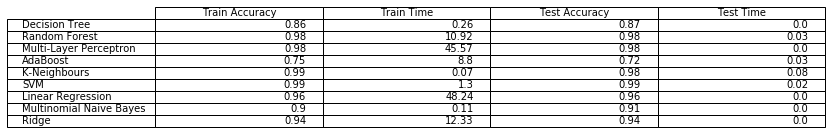

<Figure size 432x288 with 0 Axes>

In [74]:
fig = plt.figure(figsize=(12,1))
t_data = ((trn_acc_DT, trn_t_DT, tst_acc_DT, tst_t_DT),
          (trn_acc_RF, trn_t_RF, tst_acc_RF, tst_t_RF),
          (trn_acc_MLP, trn_t_MLP, tst_acc_MLP, tst_t_MLP),
          (trn_acc_AB, trn_t_AB, tst_acc_AB, tst_t_AB),
          (trn_acc_KNN, trn_t_KNN, tst_acc_KNN, tst_t_KNN),
          (trn_acc_SVM, trn_t_SVM, tst_acc_SVM, tst_t_SVM),
          (trn_acc_LR, trn_t_LR, tst_acc_LR, tst_t_LR),
          (trn_acc_MNB, trn_t_MNB, tst_acc_MNB, tst_t_MNB),
          (trn_acc_RDG, trn_t_RDG, tst_acc_RDG, tst_t_RDG))

table = plt.table(cellText = t_data, colLabels = ('Train Accuracy', 'Train Time', 'Test Accuracy', 'Test Time'),
                  rowLabels = ('Decision Tree', 'Random Forest', 'Multi-Layer Perceptron', 'AdaBoost', 'K-Neighbours', 'SVM',
                                'Linear Regression', 'Multinomial Naive Bayes', 'Ridge'), loc='center')

plt.axis('off')
plt.grid('off')
plt.show()
plt.savefig('table.jpg')